# Digits ✍️

> For this exercise, we will work on the digits dataset and try to classify the data using our new clustering algorithms!

In [33]:
# TODO : imports
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

### Q1. Load the dataset, rescale it and use PCA(32) then tSNE(2) to obtain sharp results.

In [88]:
# TODO : load dataset (limit to 500 entries)
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
#digits = fetch_openml('mnist_784')

# keep 500 first entries
chiffres = digits.data ##.to_numpy()
true_labels = digits.target
chiffres.shape ##imagettes

(1797, 64)

In [89]:
chiffres = chiffres[:500, :]
true_labels = true_labels[:500]

In [37]:
print(type(chiffres))

<class 'numpy.ndarray'>


In [78]:
df = pd.DataFrame(chiffres)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.0,0.326000,4.898000,11.060000,11.574000,5.642000,1.376000,0.204000,0.002000,1.732000,...,3.308000,0.058000,0.0,0.312000,5.338000,11.492000,11.604000,6.71800,1.760000,0.052000
std,0.0,0.974486,4.778836,4.644518,4.176051,5.590379,3.362922,1.324346,0.044721,2.777698,...,4.613861,0.423077,0.0,0.955239,5.136197,4.673073,4.699293,5.76202,3.450538,0.426215
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.0,0.000000,0.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,10.000000,9.000000,0.00000,0.000000,0.000000
50%,0.0,0.000000,4.000000,12.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,4.000000,13.000000,13.000000,7.00000,0.000000,0.000000
75%,0.0,0.000000,8.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,6.000000,0.000000,0.0,0.000000,9.000000,15.000000,15.000000,12.00000,2.000000,0.000000
max,0.0,7.000000,16.000000,16.000000,16.000000,16.000000,16.000000,13.000000,1.000000,12.000000,...,16.000000,6.000000,0.0,9.000000,16.000000,16.000000,16.000000,16.00000,16.000000,6.000000


In [79]:
# TODO: Rescaling
from sklearn.preprocessing import StandardScaler
scaled_numbers = StandardScaler().fit_transform(chiffres)
pd.DataFrame(scaled_numbers).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,500.0,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,500.0,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,0.0,-4.263256e-17,5.684342e-17,-8.526513e-17,1.776357e-17,-3.907985e-17,7.105427e-17,0.000000,2.131628e-17,-4.263256e-17,...,7.105427e-17,-4.440892e-17,0.0,-5.684342e-17,-6.394885e-17,-1.918465e-16,1.634248e-16,7.105427e-18,4.618528e-17,5.684342e-17
std,0.0,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002,1.001002e+00,1.001002e+00,...,1.001002e+00,1.001002e+00,0.0,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,0.0,-3.348703e-01,-1.025962e+00,-2.383687e+00,-2.774293e+00,-1.010245e+00,-4.095778e-01,-0.154193,-4.476615e-02,-6.241623e-01,...,-7.176881e-01,-1.372282e-01,0.0,-3.269470e-01,-1.040331e+00,-2.461658e+00,-2.471781e+00,-1.167078e+00,-5.105762e-01,-1.221263e-01
25%,0.0,-3.348703e-01,-1.025962e+00,-4.439779e-01,-6.169891e-01,-1.010245e+00,-4.095778e-01,-0.154193,-4.476615e-02,-6.241623e-01,...,-7.176881e-01,-1.372282e-01,0.0,-3.269470e-01,-1.040331e+00,-3.195957e-01,-5.546809e-01,-1.167078e+00,-5.105762e-01,-1.221263e-01
50%,0.0,-3.348703e-01,-1.881001e-01,2.025919e-01,3.418129e-01,-2.940130e-01,-4.095778e-01,-0.154193,-4.476615e-02,-6.241623e-01,...,-7.176881e-01,-1.372282e-01,0.0,-3.269470e-01,-2.607649e-01,3.230230e-01,2.973635e-01,4.899018e-02,-5.105762e-01,-1.221263e-01
75%,0.0,-3.348703e-01,6.497622e-01,8.491616e-01,8.212139e-01,9.593922e-01,-4.095778e-01,-0.154193,-4.476615e-02,4.569503e-01,...,5.840436e-01,-1.372282e-01,0.0,-3.269470e-01,7.136930e-01,7.514356e-01,7.233857e-01,9.176104e-01,6.962403e-02,-1.221263e-01
max,0.0,6.855597e+00,2.325487e+00,1.064685e+00,1.060914e+00,1.854682e+00,4.352955e+00,9.671806,2.233831e+01,3.700288e+00,...,2.753597e+00,1.405880e+01,0.0,9.104218e+00,2.077934e+00,9.656418e-01,9.363968e-01,1.612507e+00,4.131026e+00,1.396937e+01


In [49]:
# TODO : Apply dimension reduction
# PCA Github https://gist.github.com/tommct/1490cdf856d745ba41c1ac99ada2b579
#n_components = 64
#pca = PCA(n_components=n_components)
#X_pca = pca.fit(scaled_numbers)


In [80]:
# initializing the pca
n_components = 32
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_numbers)

# cumulative_variance_ratio
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

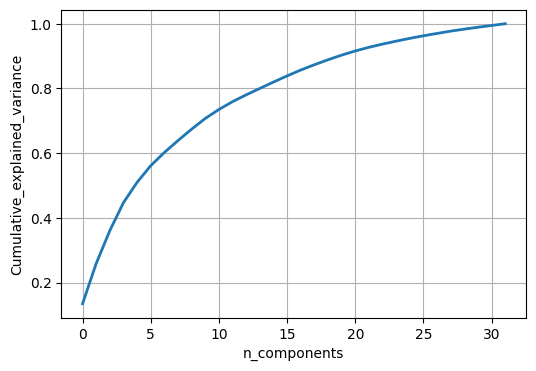

In [81]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [82]:
# tSNE(2)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

# Here we perform the t-SNE
X_tsne = tsne.fit_transform(X_pca)

### Q2. Plot the data points

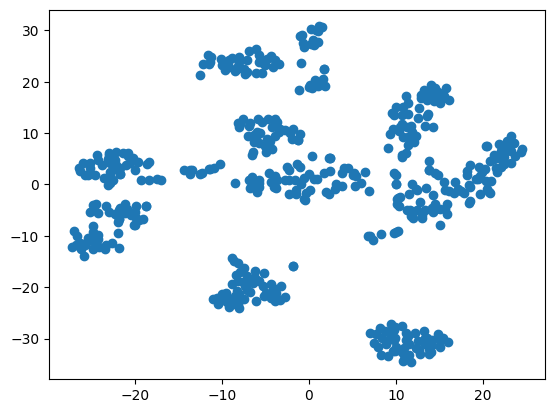

In [83]:
plt.scatter(X_tsne[:, 0], X_tsne[:,1])
plt.show()

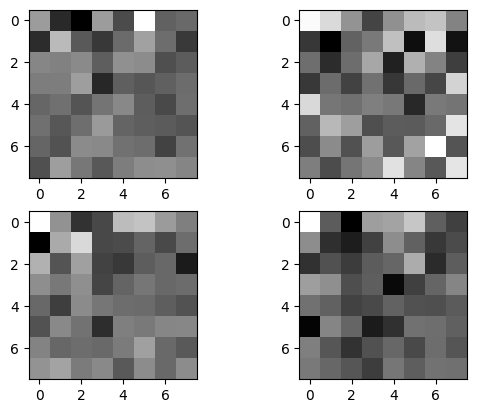

In [54]:
# TODO : plot data points
#### je n'applique pas tSNE(2) car je ne vois pas son usage: à voir dans le cours
"""
def multiplots(X):
    # voir pour générer les rows randomly
    #print(X.shape)
    #print(X[10,:])
    rows = [10, 100, 200, 300] 
    fig, axs = plt.subplots(2, 2)    
    
    for i in range(2):
        for j in range(2):
            row = 2 * i + j
            imag = X[rows[row],:]
            imag = np.array(imag, dtype='float')
            pixels = imag.reshape(8,8)
            axs[i, j].imshow(pixels, cmap='gray_r')
    
multiplots(pca_data)
"""

### Q3. Use AgglomerativeClustering to cluster the data 

(500, 32)


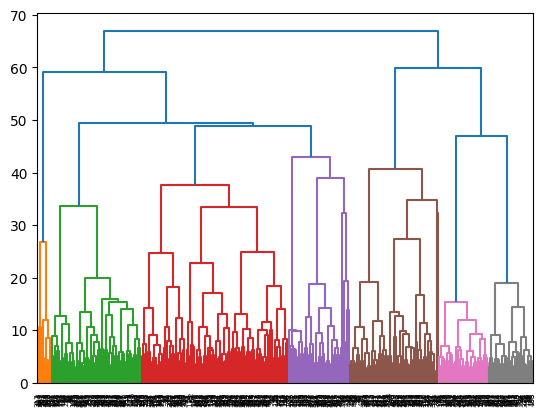

In [84]:
# TODO : generate dendrogram
print(X_pca.shape)

linked = linkage(X_pca, method='ward') ## more balanced than single
dendrogram(linked)
plt.show()


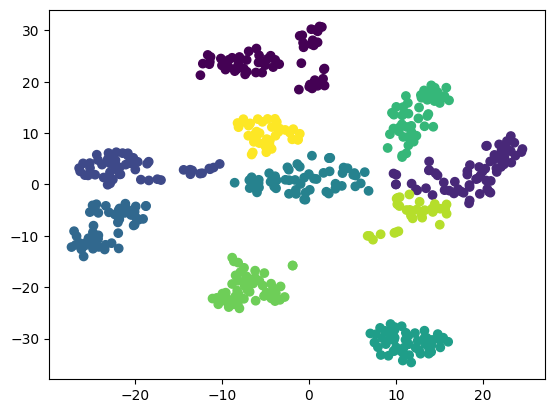

In [86]:
# TODO : apply sklearn AgglomerativeClustering algorithm on processed data
acc = AgglomerativeClustering(n_clusters=10, linkage='ward')

labels = acc.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.show()

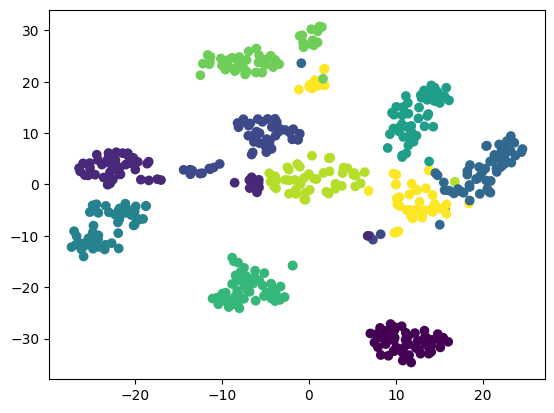

In [90]:
### plot y true figures on left and clusters on right hand
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=true_labels)
plt.show()

### Q4. Evaluate the classification model

Do the labels of the clusters correspond to the labels of the digits?<br> How can we match them? 

In [8]:
# TODO : affect label to cluster
## !!! ATTENTION: il faut relier les 10 clusters aux chiffres 0-9 !!!

In [92]:
# TODO : compute score
# F1-score classification
from sklearn.metrics import f1_score
## multi-
print(f" F1-score: {f1_score(true_labels, labels, average='weighted')}")


 F1-score: 0.0196078431372549
